# K Nearest Neighbors 

Using the Medical dataset

In [62]:
#-- Importing all nessesary libraries --# 

import statistics
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics

Population(Continous) Children (Continous) Marital_Married (Categorical) ReAdmis_Yes(Categorical) HighBlood_Yes (Categorical) Stroke_Yes (Categorical) Overweight_Yes (Categorical)	Diabetes_Yes(Categorical) Anxiety_Yes(Categorical) Asthma_Yes(Categorical)

In [63]:
#-- Importing the dataset --#
med_df_raw = pd.read_csv("/Users/lindasegalini/Desktop/WGU/New Program/D208 Predictive Modeling/medical_clean.csv")

#-- Dropping missing values --#
med_df_raw.dropna() 


#-- Dropping unessesary features --#
med_df_raw = med_df_raw.drop(columns = ['Gender','Complication_risk','Initial_admin','Additional_charges','TotalCharge','Initial_days','VitD_levels','Age','CaseOrder','Allergic_rhinitis','Reflux_esophagitis','Doc_visits','Full_meals_eaten','vitD_supp','Soft_drink','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng', 'Area','TimeZone','Job','Income','Services','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8',                       
                                       'Arthritis','Hyperlipidemia','BackPain'])

#-- Changing categorical to binary with get_dummies() and dropping the first column. 
med_df = pd.get_dummies(med_df_raw, drop_first =True)

#-- Dropping the previously combined columns to keep the number of columns down and create a tidier dataset --#
med_clean = med_df.drop(columns = ['Marital_Never Married','Marital_Separated','Marital_Widowed'])


In [64]:
#-- Filtering the data frame to remove the values exceeding 3 standard deviations --#
med_remove_df = med_clean[(np.abs(stats.zscore(med_df)) < 3).all(axis=1)]

#-- Displaying what rows were removed --#
med_clean.index.difference(med_remove_df.index)

Int64Index([  16,   79,  146,  153,  156,  160,  163,  180,  185,  219,
            ...
            9788, 9792, 9798, 9799, 9813, 9833, 9845, 9851, 9854, 9924],
           dtype='int64', length=413)

In [65]:
#-- Inspecting the cleaned data set --#
med_clean.head()

,Population,Children,Marital_Married,ReAdmis_Yes,HighBlood_Yes,Stroke_Yes,Overweight_Yes,Diabetes_Yes,Anxiety_Yes,Asthma_Yes
0,2951,1,0,0,1,0,0,1,1,1
1,11303,3,1,0,1,0,1,0,0,0
2,17125,3,0,0,1,0,1,1,0,0
3,2162,0,1,0,0,1,0,0,0,1
4,5287,1,0,0,0,0,0,0,0,0


In [66]:
#-- Saving the dataset --#
med_clean.to_csv('/Users/lindasegalini/Desktop/WGU/New Program/D209 Data Mining/KNN/Submissions/KNN.csv')


In [67]:
#-- Split the data into crossvalidation and holdout sets --#

#Split the data into X & y

X = med_clean.drop('ReAdmis_Yes', axis = 1).values
y = med_clean['ReAdmis_Yes']

y = y.astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y)

#-- Initailizing KNN Classifier --#

knn = KNeighborsClassifier(n_neighbors = 48)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

y_pred

#-- The initial score of the model --#
knn.score(X_test,y_test)

0.6303333333333333

In [68]:

#-- 'n_neighbors':is the hyperparameter name --#
#-- The parameters the grid will cover --#

knn = KNeighborsClassifier()


param_grid = {'n_neighbors': np.arange(1, 50)} #-- if we specify more parameters, all will b tried--#

#-- grid variable--#
knn_cv = GridSearchCV(knn, param_grid, cv=10)

knn_cv.fit(X,y) #-- Finds all the parameters --#

#--to retrieve the hyperparameters that perform the best along with the mean cross-validation 
#-- score over that fold--#

knn_cv.best_params_ 

#-- Compute and print metrics --#
print("Accuracy: {}".format(knn_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(knn_cv.best_params_))


Accuracy: 0.6396666666666667
              precision    recall  f1-score   support

           0       0.63      0.99      0.77      1899
           1       0.40      0.02      0.03      1101

    accuracy                           0.63      3000
   macro avg       0.52      0.50      0.40      3000
weighted avg       0.55      0.63      0.50      3000

Tuned Model Parameters: {'n_neighbors': 48}



 KNN 
Test confusion_matrix
KNN Scores:  
The True Positive Rate is: [0.98683518 0.01544051]
The Precision is: [0.63353617 0.4047619 ]
The False positive rate is: [0.98455949 0.01316482]
The False Negative Rate is:  [0.01316482 0.98455949]

The average TPR is: 0.5011378425185778
The average Precision is: 0.5191490389259152
The average False positive rate is: 0.49886215748142215
The average False Negative Rate is: 0.49886215748142215


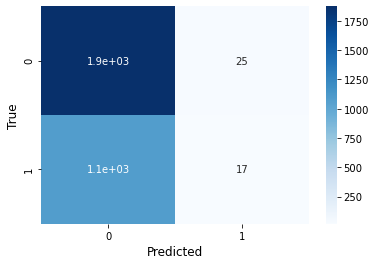

In [69]:
#-- Generating the confusion matrix --#
from sklearn.metrics import confusion_matrix

y_true = y_test # True values
cf_matrix = confusion_matrix(y_true, y_pred)
print("\n KNN \nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

#-- Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cf_matrix.sum(axis=0) - np.diag(cf_matrix)
FN = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
TP = np.diag(cf_matrix)
TN = cf_matrix.sum() - (FP + FN + TP)

print('KNN Scores:  ')
#-- Sensitivity, hit rate, recall, or true positive rate --#
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

#-- Precision or positive predictive value --#
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

#-- False positive rate or False alarm rate --#
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


#-- False negative rate or Miss Rate --#
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

#-- Total averages --#
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)


In [70]:
from sklearn.model_selection import cross_val_score

#-- Generating the AUC scores for six different strate--#  

cv_scores = cross_val_score(knn_cv, X, y,cv=6,
                           scoring = 'roc_auc')

print('AUC score: ', cv_scores)

AUC score:  [0.49938935 0.52763142 0.50011151 0.53248459 0.47951691 0.50601143]


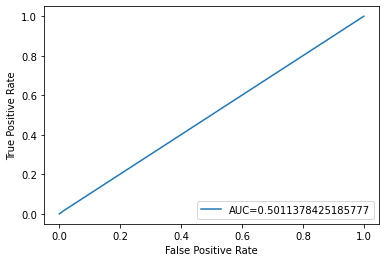

In [71]:
#-- Plotting the AUC --#

fpr, tpr, _ = metrics.roc_curve(y_true,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [72]:
#-- Saving a copy of the training and testing datasets --#
X_train =pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train = pd.DataFrame(y_train)

y_test = pd.DataFrame(y_test)

X_train.to_csv('/Users/lindasegalini/Desktop/WGU/New Program/D209 Data Mining/KNN/Submissions/KNN.csv')

X_test.to_csv('/Users/lindasegalini/Desktop/WGU/New Program/D209 Data Mining/KNN/Submissions/KNN.csv')

y_train.to_csv('/Users/lindasegalini/Desktop/WGU/New Program/D209 Data Mining/KNN/Submissions/KNN.csv')

y_test.to_csv('/Users/lindasegalini/Desktop/WGU/New Program/D209 Data Mining/KNN/Submissions/KNN.csv')
